## KNN

In [59]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
print(wine.feature_names)
print(wine.target_names)
wine.keys()

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [60]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [61]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df = pd.concat([df, pd.DataFrame(wine.target, columns=["wine_class"])], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [63]:
df["wine_class"].value_counts()

1    71
0    59
2    48
Name: wine_class, dtype: int64

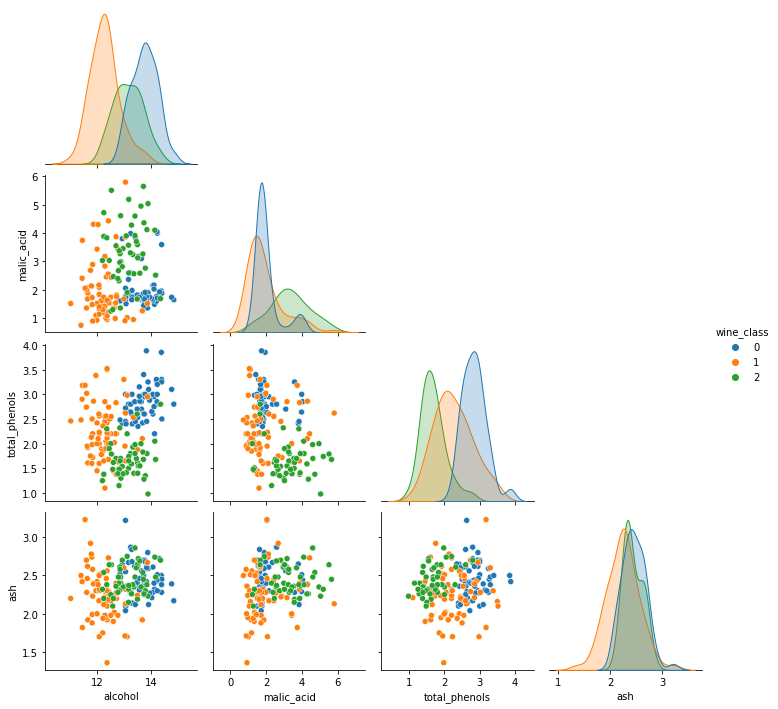

In [64]:
sns.pairplot(data = df[["alcohol", "malic_acid", "total_phenols", "ash", "wine_class"]], corner=True, hue="wine_class", palette = "tab10")

<AxesSubplot:>

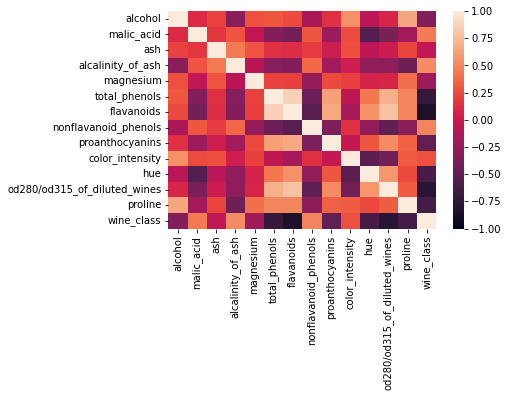

In [65]:
sns.heatmap(df.corr(), annot=False, vmin=-1, vmax=1)

# KNN classification

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X, y = df.drop("wine_class", axis = 1), df["wine_class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(scaled_X_test.min(), scaled_X_test.max())
print(scaled_X_train.min(), scaled_X_train.max())

model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(scaled_X_train, y_train)

y_pred = model_KNN.predict(scaled_X_test)
y_pred[:10], np.array(y_test[:10])

-0.05077262693156731 1.3333333333333335
0.0 1.0


(array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2]), array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2]))

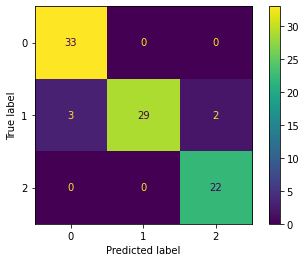

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Elbow plot

[Text(0.5, 1.0, 'Elbow plot'),
 Text(0.5, 0, 'K Neighbors'),
 Text(0, 0.5, 'Error')]

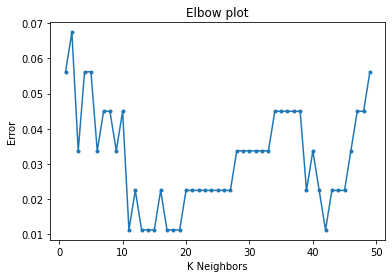

In [76]:
error_list = []

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, y_train)
    y_pred = model_KNN.predict(scaled_X_test)
    error = 1 - accuracy_score(y_pred, y_test)
    error_list.append(error)

fig, ax = plt.figure(), plt.axes()
ax.plot(range(1, 50), error_list, ".-")
ax.set(title = "Elbow plot", xlabel = "K Neighbors", ylabel="Error")

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00        22

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



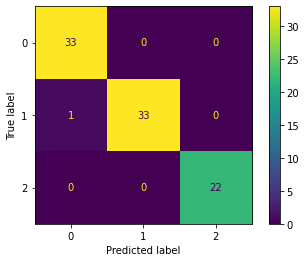

In [82]:
model_KNN = KNeighborsClassifier(n_neighbors=11)
model_KNN.fit(scaled_X_train, y_train)
y_pred = model_KNN.predict(scaled_X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))